In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as colors
import geopandas as gpd
from matplotlib.font_manager import FontProperties
import numpy as np

In [8]:
df_nations = pd.read_csv('../data/cleaned/merged_nazionalita.csv')

In [9]:
df_nations.head()

,Nazione,Valore
0,Afghanistan,83223
1,Algeria,25905
2,Bangladesh,416907
3,Burkina Faso,99092
4,Cameroon,46978


In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_nations, left_on='name', right_on='Nazione', how='left')




/var/folders/19/2pb1lbcd5c55tc1_wscxp2jw0000gn/T/ipykernel_7729/1421719264.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


/var/folders/19/2pb1lbcd5c55tc1_wscxp2jw0000gn/T/ipykernel_7729/599200924.py:50: UserWarning: Glyph 45 (-) missing from current font.
  plt.savefig('../outputs/world_map.png', bbox_inches='tight', dpi=300, facecolor="white")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45 (-) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


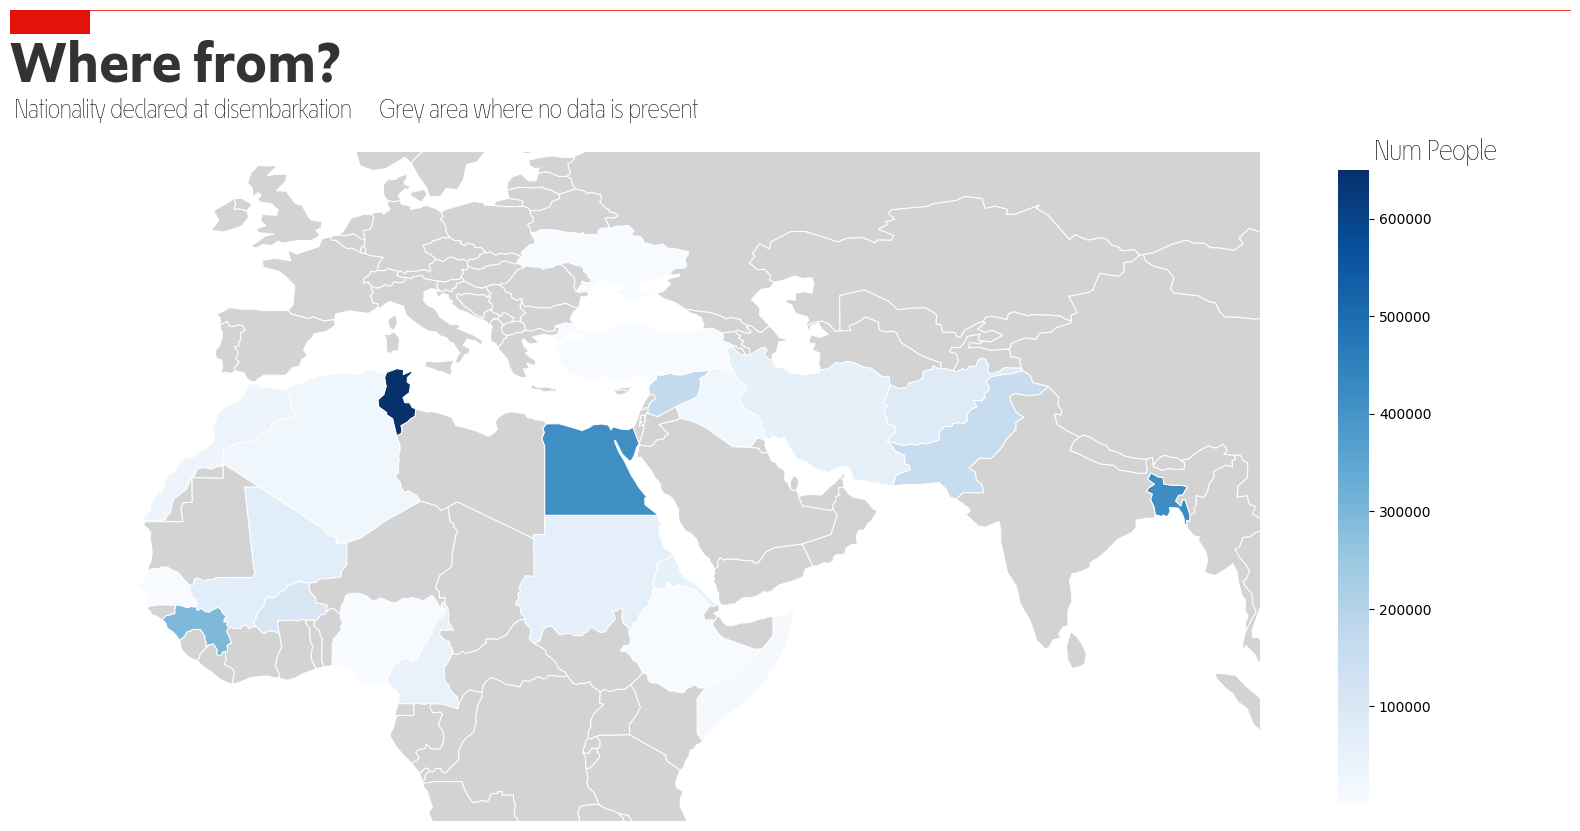

In [11]:
font_path = '../data/econosans/ecosans-bol.woff2.ttf'  # Update this path
custom_font = FontProperties(fname=font_path, size=35)
font_path2 = '../data/econosans/EconoSansReduced-35Thin.ttf' 
custom_font2 = FontProperties(fname=font_path2, size=100)

fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi = 100)
column = 'Valore'
vmin, vmax = world[column].min(), world[column].max()

# Create the choropleth map
mapping = world.plot(
    column=column,
    cmap="Blues",
    linewidth=0.75,
    ax=ax,
    edgecolor='white',
    vmin=vmin,
    vmax=vmax,
    missing_kwds={'color': 'lightgrey'}
)
ax.set_axis_off()

ax.plot([0.12, 0.9], [0.9, 0.9], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=0.6)
ax.add_patch(plt.Rectangle((0.12, 0.9), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth=0))

ax.set_xlim([-30, 100])
ax.set_ylim([-10, 60])
fig.text(
    0.12, 0.84, "Where from?", 
    fontsize=40, fontweight="bold", fontproperties=custom_font,
    transform=fig.transFigure, 
    ha='left',  alpha=.8)
fig.text(
    0.123, 0.81, "Nationality declared at disembarkation -  Grey area where no data is present", 
    fontsize=18, fontproperties=custom_font2
)

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

# Add colorbar
# Adjust the shrink parameter as necessary to match the map's height
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7,  format='%d')
cbar.outline.set_edgecolor('none')
 # Adding title to the colorbar
cbar.set_label('Num People', fontproperties=custom_font2, fontsize=20,   rotation = 0, y = 1.05, x = -0.8) # Adding title to the colorbar

#ax.text(x=0.12, y=0.2, s="""Source: Cruscotto statistico giornaliero via www.libertaciviliimmigrazione.dlci.interno.gov.it/it""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7, fontproperties=custom_font2)
plt.savefig('../outputs/world_map.png', bbox_inches='tight', dpi=300, facecolor="white")
plt.show()
#plt.tight_layout()
